<a href="https://colab.research.google.com/github/drxmeenakshi95/EV-Data-Analysis/blob/main/EV_Analysis_Meenakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electric Vehicle Population Data Analysis

**Name:** Meenakshi



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load Dataset

In [39]:
df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1b0y1ugyr8IVtf-eE9bXv2fv6vct4zbFg&export=download')
df.columns = df.columns.str.strip()
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


## Question 1.1
How many missing values exist in the dataset, and in which columns?

In [40]:
df.isna().sum().sort_values(ascending=False)

,0
Legislative District,389
Vehicle Location,9
2020 Census Tract,5
County,5
City,5
Postal Code,5
Electric Utility,5
VIN (1-10),0
State,0
Electric Vehicle Type,0


## Question 1.2
How should missing or zero values in the Base MSRP and Electric Range columns be handled?

In [41]:
df['Base MSRP'] = df['Base MSRP'].replace(0, np.nan)
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)

/tmp/ipython-input-316464147.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
/tmp/ipython-input-316464147.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## Question 1.3
Are there duplicate records in the dataset? If so, how should they be managed?

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df = df.drop_duplicates()

## Question 1.4
How can VINs be anonymized while maintaining uniqueness?

In [44]:
df['VIN_Anon'] = df['VIN (1-10)'].astype('category').cat.codes
df.drop(columns=['VIN (1-10)'], inplace=True)

## Question 1.5
How can Vehicle Location (GPS coordinates) be cleaned or converted for better readability?

In [45]:
df = df.dropna(subset=['Vehicle Location'])
coords = df['Vehicle Location'].str.extract(r'(-?\d+\.\d+)\s*,?\s*(-?\d+\.\d+)')
df['Longitude'] = pd.to_numeric(coords[0], errors='coerce')
df['Latitude'] = pd.to_numeric(coords[1], errors='coerce')
df.drop(columns=['Vehicle Location'], inplace=True)
df = df.dropna(subset=['Longitude','Latitude'])

# 2. Data Exploration

## Question 2.1
What are the top 5 most common EV makes and models?

In [46]:
df['Make'].value_counts().head(5)

,count
Make,
TESLA,79655
NISSAN,13997
CHEVROLET,13677
FORD,9199
BMW,7570


In [47]:
df['Model'].value_counts().head(5)

,count
Model,
MODEL Y,35989
MODEL 3,30091
LEAF,13365
MODEL S,7734
BOLT EV,6820


## Question 2.2
What is the distribution of EVs by county?

In [48]:
df['County'].value_counts().head(10)

,count
County,
King,92740
Snohomish,21001
Pierce,13782
Clark,10416
Thurston,6428
Kitsap,5840
Spokane,4586
Whatcom,4253
Benton,2147


## Question 2.3
How has EV adoption changed over different model years?

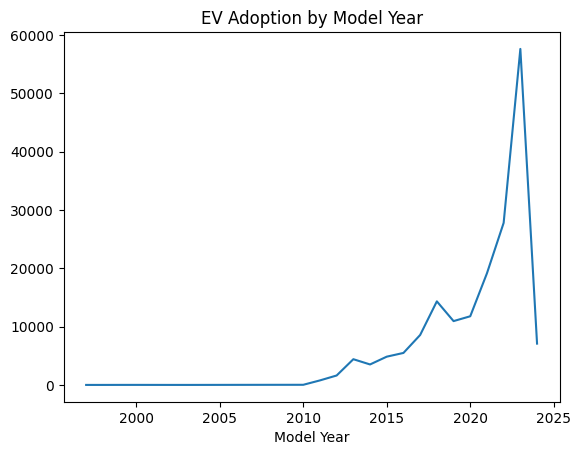

In [49]:
df.groupby('Model Year').size().plot(kind='line')
plt.title('EV Adoption by Model Year')
plt.show()

## Question 2.4
What is the average electric range of EVs?

In [50]:
df['Electric Range'].mean()

np.float64(102.2658596512929)

## Question 2.5
What percentage of EVs are CAFV eligible?

In [51]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

,proportion
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,51.698274
Clean Alternative Fuel Vehicle Eligible,37.291757
Not eligible due to low battery range,11.009969


## Question 2.6
How does the electric range vary across different makes and models?

In [52]:
df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

,Electric Range
Make,
JAGUAR,214.603448
TESLA,134.357705
CHEVROLET,121.085691
POLESTAR,108.157596
TH!NK,100.000000
WHEEGO ELECTRIC CARS,100.000000
NISSAN,99.649353
VOLKSWAGEN,89.015787
HYUNDAI,85.798411


In [53]:
df.groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10)

,Electric Range
Model,
KONA,258.000000
ROADSTER,234.673913
I-PACE,214.603448
MODEL S,195.498578
BOLT EV,185.625220
MODEL X,173.366868
E-TRON,161.719780
MODEL 3,154.888206
E-TRON SPORTBACK,141.945946


## Question 2.7
What is the average Base MSRP for each EV model?

In [54]:
df.groupby('Model')['Base MSRP'].mean().sort_values(ascending=False).head(10)

,Base MSRP
Model,
918,845000.000000
ROADSTER,105696.739130
KARMA,102000.000000
740E,90385.937500
CT6,75095.000000
PANAMERA,69331.818182
MODEL S,61671.399017
CAYENNE,61258.217270
XC90,60187.860662


## Question 2.8
Are there any regional trends in EV adoption?

In [55]:
df['City'].value_counts().head(10)

,count
City,
Seattle,29447
Bellevue,8931
Redmond,6478
Vancouver,6193
Bothell,5863
Kirkland,5362
Sammamish,5280
Renton,4980
Olympia,4299


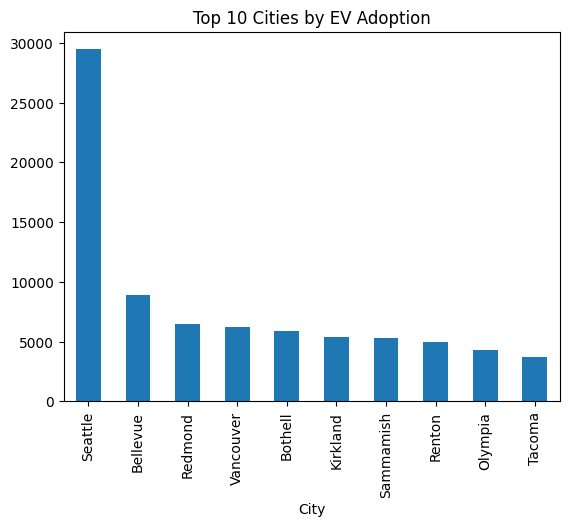

In [56]:
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by EV Adoption')
plt.show()

# 3. Data Visualization

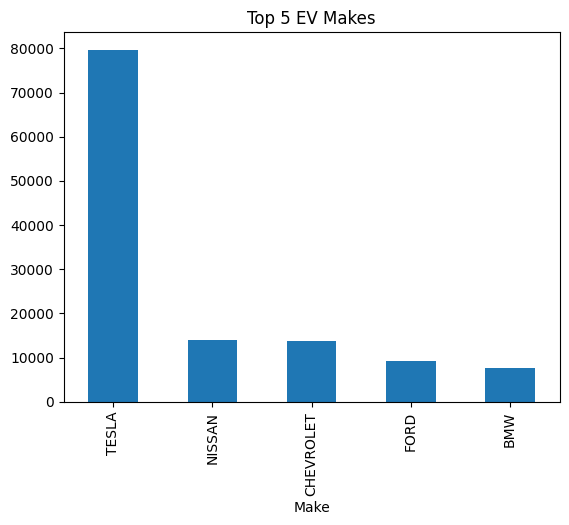

In [57]:
df['Make'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 EV Makes')
plt.show()

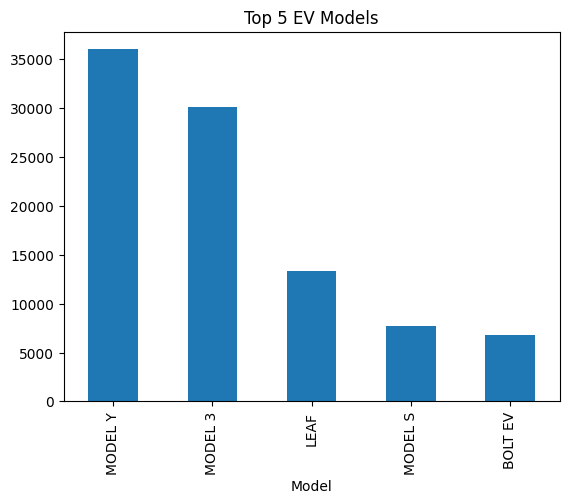

In [58]:
df['Model'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 EV Models')
plt.show()

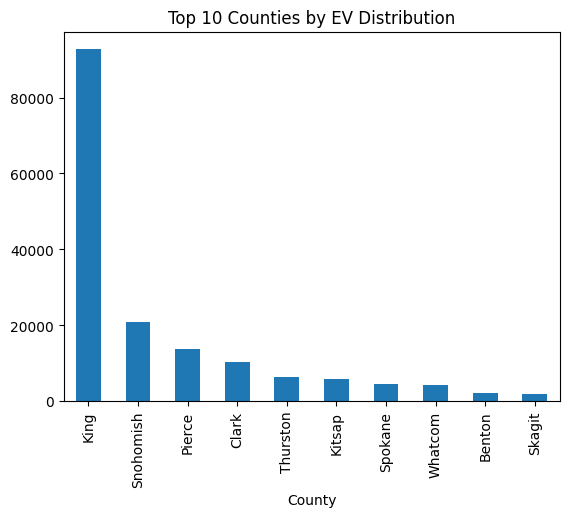

In [59]:
df['County'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Counties by EV Distribution')
plt.show()

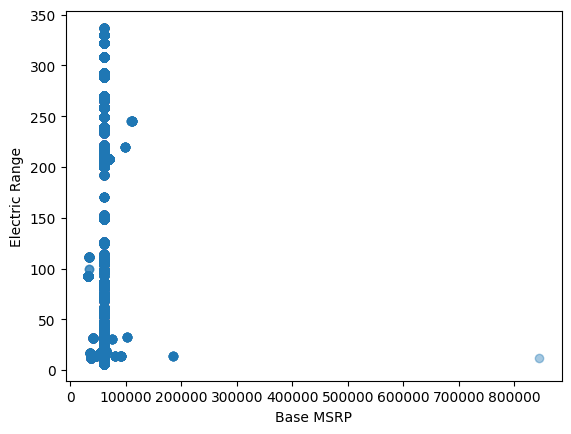

In [60]:
plt.scatter(df['Base MSRP'], df['Electric Range'], alpha=0.4)
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.show()

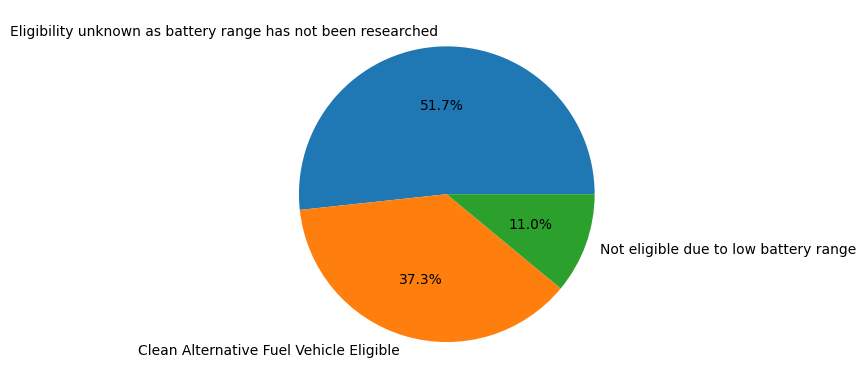

In [61]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.show()

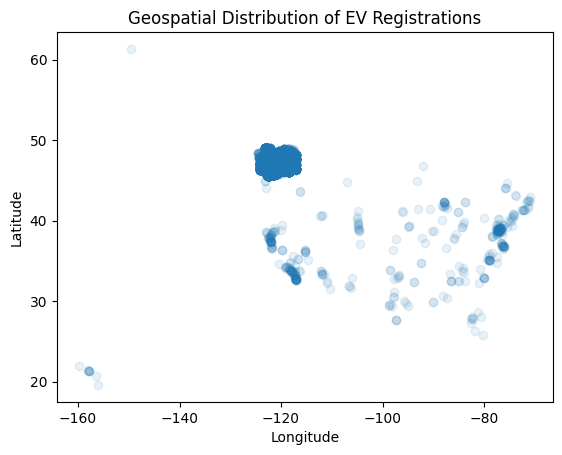

In [62]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of EV Registrations')
plt.show()

# 4. Linear Regression Model

In [63]:
X = df[['Model Year','Base MSRP','Make']]
y = df['Electric Range']

In [64]:
preprocessor = ColumnTransformer([
    ('num','passthrough',['Model Year','Base MSRP']),
    ('cat',OneHotEncoder(handle_unknown='ignore'),['Make'])
])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = Pipeline([
    ('prep', preprocessor),
    ('lr', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Model Year', 'Base MSRP']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make'])])),
                ('lr', LinearRegression())])

In [66]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.32309737685387174

In [67]:
new_data = pd.DataFrame({
    'Model Year':[2023],
    'Base MSRP':[50000],
    'Make':['TESLA']
})
model.predict(new_data)

array([114.565751])